# 词袋模型与TF-IDF（ENG)

词袋模型
1. 就是用来计算词频的，牺牲词之间的相互关系
词袋模型（Bag of Words, BoW）是一种在自然语言处理（NLP）和信息检索（IR）中广泛使用的文本表示技术。在词袋模型中，文本（比如一句话或一个文档）被表示为一个装着其词语的“袋子”，而词语的顺序则被忽略。这意味着文档被描述为词语出现的频率，而不考虑其在文档中的位置或者相互之间的关系。这个模型的简单性是其既是优点也是缺点。

### 工作原理
1. **词汇表创建**：首先，需要创建一个包含文本数据集中所有不同词语的列表，称为词汇表。
2. **文档表示**：接着，每个文档都被转换成一个向量，其长度等于词汇表的大小。向量的每一个元素是特定词语在文档中出现的次数或者是这个词语的权重（例如TF-IDF权重）。

### 应用
- **文本分类**：词袋模型可以用于训练分类器进行文本分类，如垃圾邮件检测、情感分析等。
- **文档聚类**：通过将文档转换为向量，可以使用各种聚类算法来识别文档集中的自然分组。
- **信息检索**：在搜索引擎中，词袋模型可以帮助确定查询与一组文档的相关性。
- **特征提取**：作为机器学习模型的输入，为更复杂的NLP任务提供基础特征。

### 优缺点
**优点**：
- 简单易于实现。
- 在许多情况下，尤其是在文档级别的任务中，效果不错。

**缺点**：
- 忽略了词语之间的顺序和句法结构，可能会丢失文本的某些语义信息。
- 词汇表通常很大，导致生成的向量维度高，可能需要大量的存储空间和计算资源。
- 对于同义词和多义词处理不佳，因为它只是简单地将词语视为独立的单位。

尽管词袋模型有其局限性，但它仍然是很多NLP任务的有效起点。对于复杂任务，可以考虑使用更高级的模型，如Word2Vec、GloVe或BERT，它们能够捕捉词语之间的关系和语义信息。我们一起学习这些概念时，可以深入探讨这些高级模型如何克服词袋模型的局限性。


In [6]:
import numpy
import matplotlib
import wordcloud
import nltk
import sklearn


In [9]:
# 首先导入Pandas库
import pandas as pd
import re
from nltk.stem import PorterStemmer
# 这里不能是 import pandas
# 一定要加pd



# 读取数据

In [10]:
import pandas as pd

# 确保文件路径正确，且包含了正确的文件扩展名
file_path = '/Users/siliang/Downloads/text_analysis_twitter.csv'
data = pd.read_csv(file_path)

# 查看数据的前几行
print(data.head())


   Unnamed: 0                  id   screen_name                       time  \
0           0  881004944714866688  KamalaHarris  2017-07-01T00:22:01-04:00   
1           1  881002538341986304    MarcVeasey  2017-07-01T00:12:28-04:00   
2           2  881001393284419584  RepPaulTonko  2017-07-01T00:07:55-04:00   
3           3  881000301007958016     clairecmc  2017-07-01T00:03:34-04:00   
4           4  881015727540637696       tedcruz  2017-07-01T01:04:52-04:00   

                                                link  \
0  https://www.twitter.com/KamalaHarris/statuses/...   
1  https://www.twitter.com/kylegriffin1/statuses/...   
2  https://www.twitter.com/RepPaulTonko/statuses/...   
3  https://www.twitter.com/clairecmc/statuses/881...   
4  https://www.twitter.com/larry_kudlow/statuses/...   

                                                text               source  
0  Republicans are trying to steal health care fr...        Sprout Social  
1  RT @kylegriffin1 Rep. Mark Veasay has i

# 报错举例：加载文件的时候，没加拓展名

In [12]:


# 替换下面的路径为你的文件实际路径
file_path = '/Users/siliang/Downloads/text_analysis_twitter.csv'
data = pd.read_csv(file_path)

# 查看数据的前几行
print(data.head())


   Unnamed: 0                  id   screen_name                       time  \
0           0  881004944714866688  KamalaHarris  2017-07-01T00:22:01-04:00   
1           1  881002538341986304    MarcVeasey  2017-07-01T00:12:28-04:00   
2           2  881001393284419584  RepPaulTonko  2017-07-01T00:07:55-04:00   
3           3  881000301007958016     clairecmc  2017-07-01T00:03:34-04:00   
4           4  881015727540637696       tedcruz  2017-07-01T01:04:52-04:00   

                                                link  \
0  https://www.twitter.com/KamalaHarris/statuses/...   
1  https://www.twitter.com/kylegriffin1/statuses/...   
2  https://www.twitter.com/RepPaulTonko/statuses/...   
3  https://www.twitter.com/clairecmc/statuses/881...   
4  https://www.twitter.com/larry_kudlow/statuses/...   

                                                text               source  
0  Republicans are trying to steal health care fr...        Sprout Social  
1  RT @kylegriffin1 Rep. Mark Veasay has i

导入方式2

In [26]:
#导入数据
text_ana  = pd.read_csv('/Users/siliang/Downloads/text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'],axis=1)

In [33]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('/Users/siliang/Downloads/text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


# jieba分词

In [34]:
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/h0/_znycv1j413dcrzbt4jm4gt40000gn/T/jieba.cache
Loading model cost 0.303 seconds.
Prefix dict has been built successfully.


0    # 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...
1                                                 转发 C
2    【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...
3    丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程...
4        诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！
Name: 标题/微博内容, dtype: object

In [35]:
text = list(text_ana['标题/微博内容'].dropna())
text

['# 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言 自 在 人心   \u200b \u200b',
 '转发 C',
 '【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能 唱 跳 不 设限 ， 运动 联 濛 开 新年 🇨 🇳   期待 全能 音乐 人 @ 刘雨昕   与 # 运动 者 联 濛 # 一起 ， 为 冬奥 赛事 助力 加油 ！ 】',
 '丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程鑫   二十 成金筑梦鑫 世界 #   大年初一 锁定 @ 北京 卫视   和 门面 主舞 @ 时代 少年 团 - 丁程鑫   一起 过大年 ， 拥抱 冰雪 ， 致敬 冬奥 ！',
 '诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！',
 '转发 C',
 '# 熊猫 守护者 ## 全面 二 创冰墩 墩 # 北京 冬奥会 如火如荼 地 进行 中 ， 滚滚 我 的 好 朋友 冰墩 墩 也 十分 活跃 ， 看 滚滚 我 做 一组 舒展 运动 ， 为 中国 健儿 加油 鼓 劲儿 ！ [ 嘻嘻 ] [ 嘻嘻 ]   http : / / t . cn / A6ilerDZ   视频 来源 ： @ 桃花源 生态 保护 基金会   \u200b \u200b \u200b',
 '转发 C',
 '2022 北京 冬奥会 加油 ！ 冰墩 墩 雪容融 也 非常 可爱 ！ 期待 我国 奥运健儿 们 的 精彩 表现 [ 开学 季 ] # 云 支教 迎 冬奥 #   \u200b \u200b',
 '和 @ TFBOYS - 易 烊 千玺   一起 助力 东奥 ！ 一起 向 未来 ！',
 '转发 C',
 '[ 心 ]',
 '守护 [ 心 ]',
 '# 易 烊 千玺 邀 你 唱响 一起 向 未来 #   / / @ M28 号 星球 : # 易 烊 千玺 邀 你 唱响 一起 向 未来 #   26.17',
 '/ / @ 翔霖 神谕 : 感谢 @ 爱奇艺   的 分享 。 新年 胜 旧年 ， 春妍 惹 绚烂 ， 万事 胜意 与 平安 喜乐 的 祝福 徒增 和 乐 ， @ 时代 少年 团 - 严浩翔   @ 

# 构建词袋模型

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 602)


In [37]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [38]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# 词频统计

In [39]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [40]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

602

In [41]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

# 词云图

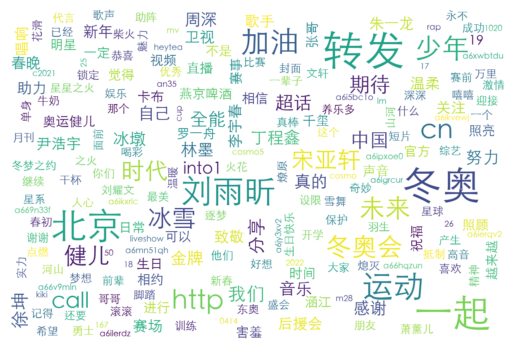

In [43]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='/System/Library/Fonts/STHeiti Light.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
截取片段数据

In [14]:
text = pd.read_csv('/Users/siliang/Downloads/text_analysis_twitter.csv', nrows=100)
text = text.drop(['Unnamed: 0'],axis=1)

In [15]:
# 查看读取的数据
print(text)

                    id    screen_name                       time  \
0   881004944714866688   KamalaHarris  2017-07-01T00:22:01-04:00   
1   881002538341986304     MarcVeasey  2017-07-01T00:12:28-04:00   
2   881001393284419584   RepPaulTonko  2017-07-01T00:07:55-04:00   
3   881000301007958016      clairecmc  2017-07-01T00:03:34-04:00   
4   881015727540637696        tedcruz  2017-07-01T01:04:52-04:00   
..                 ...            ...                        ...   
95  881162685638991872  RepRobinKelly  2017-07-01T10:48:50-04:00   
96  881161516715827200      RepRaskin  2017-07-01T10:44:11-04:00   
97  881160434426015746   GregoryMeeks  2017-07-01T10:39:53-04:00   
98  881160236807184385   SenatorLeahy  2017-07-01T10:39:06-04:00   
99  881160226451402752     repcleaver  2017-07-01T10:39:03-04:00   

                                                 link  \
0   https://www.twitter.com/KamalaHarris/statuses/...   
1   https://www.twitter.com/kylegriffin1/statuses/...   
2   https://

In [16]:
print(type(text))


<class 'pandas.core.frame.DataFrame'>


In [17]:
text = list(list['text'])[:100]

In [19]:
for i, item in enumerate(text):
    print(f"Item {i}: {item} (type: {type(item)})")
    if i >= 10:  # 只打印前10个元素来避免输出太多
        break


Item 0: *list['text'] (type: <class 'types.GenericAlias'>)


In [18]:

text = " ".join(text)
text

TypeError: sequence item 0: expected str instance, types.GenericAlias found

In [ ]:
# 假设这是你的原始数据字典
data_dict = {
    'text': ["这是第一句话", "这是第二句话", "...", "这是第N句话"]  # 假设里面有很多句话
}

# 从字典中获取 'text' 对应的值，这里假设它是一个字符串列表
# 然后取这个列表的前100个元素
text_list = data_dict['text'][:100]

# 将列表中的字符串用空格连接成一个单一的字符串
text = " ".join(text_list)

# 现在 text 包含了用空格连接的前100个字符串
print(text)


# " ".join(text)

.join() 方法：这个方法被用来将一个序列（列表、元组等）中的元素连接成一个字符串。在这个特定的例子中，" ".join(text) 使用一个空格 " " 作为连接符，将text列表中的所有元素连接成一个单一的字符串。这意味着如果text是一个字符串列表，比如 ['这', '是', '在', '干嘛']，这个方法会将其转换成 '这 是 在 干嘛'。

赋值给text变量：通过 text =，新生成的字符串（即由列表元素通过空格连接成的字符串）被重新赋值给变量text。这样，原来的text变量（假设它之前是一个列表）现在变成了一个新的字符串，内容是原列表中的元素用空格分隔开。

简而言之，这行代码将一个包含多个字符串元素的列表转换成了一个单一的字符串，列表中的每个元素之间用一个空格分隔。这个操作在文本处理中非常常见，特别是在需要将分词后的文本重新组合成一句完整话时。

# 数据清洗/数据预处理

In [ ]:
中英文语料处理的不同逻辑
英文：词性还原
处理无意义的；标点符号；URL链接


加入自定义的筛选条件，

In [20]:
import re

def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)    
    return text

# 构建词袋模型¶

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [ ]:
list(X.toarray())

# 词频统计

In [3]:
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
vectorizer = CountVectorizer()


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


In [12]:
# 假设 texts 是你的文本数据，一个字符串的列表
texts = ["sample text", "another example text", "third sample text"]
X = vectorizer.fit_transform(texts)


In [13]:
feature_words = vectorizer.get_feature_names_out()


In [14]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [15]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('text', 3), ('sample', 2), ('another', 1), ('example', 1), ('third', 1)]

# 词云图

# 拓展：还原成词根

In [22]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# 初始化词形还原器
lemmatizer = WordNetLemmatizer()

# 示例单词
word = "running"

# 进行词形还原
lemma = lemmatizer.lemmatize(word, pos='v') # 假设为动词

print(lemma)


[nltk_data] Downloading package wordnet to /Users/siliang/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/siliang/nltk_data...


run


# 个人数据导入

In [86]:
# 导入数据
import pandas as pd

text_ana = pd.read_csv('PsyQA_output.csv', index_col=0)


text_ana

,description,keywords,answers,questionID
question,,,,
去爱一个事事让着你的人，是一种不可能的期待吗？,去爱一个事事让着你的人？有这样的人么？是一种不可能的期待么？,"恋爱,恋爱经营",[{'answer_text': '你好，首先回答你关于有没有事事让着你的人，如果你真的去找...,4394
为什么总是会因为他人学习而过度焦虑？,经常在校园里看到学习的人，于是便觉得自己变得不求上进，心里产生焦虑，害怕和别人的距离拉大，总...,"行为,应激,焦虑,困惑",[{'answer_text': '～～很抱歉看到你最近状态不佳，抱抱你呀～看了你的描述“会...,4395
我们都会和讨厌的人相处吗？怎样相处是最佳方式？,身边如果有讨厌的人，怎样相处是一种最佳方式呢？,"人际,人际边界,社会适应",[{'answer_text': '这可真是个难题呢。想到两种可能。一，这个人讨厌，但于你的...,4397
遇到心动的东西不舍得买，是不爱自己吗？,有时候看到自己喜欢的物品很心动，但是不舍得买，有时看到特别想吃东西，也不舍得买给自己，总要等...,"成长,自我成长,自我接纳,人生意义",[{'answer_text': '题主你好呀！一般来说是这样的，我自己曾经就是这样的人，舍...,4398
工作很压抑，怎么才能和自己和解？或者说改变呢？,工作压力很大，总觉得很多事情都完成不了，所以心里压力特别大，还曾经被挺喜欢的同事欺负，所以更...,"情绪,抑郁情绪,焦虑情绪,情绪调节",[{'answer_text': '希望以下回答能帮助到你：️**首先对你所描述的情况梳理如...,4399
...,...,...,...,...
知道买的东西不一定是自己想要的如何抵抗自己买买买？,经历多个双11，得出结论，在双11买的东西，也并不一定是自己想要的，有的时候买的会过多，可是...,"行为,控制,困惑",[{'answer_text': '题主你好！特别理解你的心情，大多数人都抵挡不住这种诱惑的...,4504
喜欢上了游戏好友怎么办？都对这份感情感到迷茫。,总而言之就是我俩互相喜欢都没有恋爱经验（18岁的19岁）都对这份感情感到迷茫他是很敏感不愿意...,"恋爱,安全感,吵架,好感",[{'answer_text': '豆寇年华，对美好的爱情有止不住的向往，又刚好遇上一个可以...,4505
我们该义无反顾的爱一场吗？,我遇见了一个令我感到自由的男孩，然后那个男孩让我问另一个女孩子有没有女朋友，然后我就对那个男...,"恋爱,依赖依恋,恋爱经营,好感",[{'answer_text': '看了你的描述，那个令你感到自由的男孩，是你比较心动的人。...,4506


In [87]:
# 分析语料
text = list(text_ana['answers'])
text

["[{'answer_text': '你好，首先回答你关于有没有事事让着你的人，如果你真的去找这样的人还是基本上能够找到的，并不算是非常不可能的期待。在我的所见所谓中就看到过不止有一个这样的人。但你要说你还能去爱一个这样的人，那就太不容易了，就变成了比较困难的事情，为什么这样说，通常常见的情况是你爱的人不爱你，爱你的人你又不爱，所以常常难以两全。当然相爱的情况还是很多的，但相爱又要他事事让着你，唔，这就有点麻烦了。无论如何两个人在一起首先是两个相互独立的个体，总有一些自己不同于任何的需要和想法，因为爱，两个人会磨合会有拖鞋和退让，互相拉锯，关系才能保持平衡，如果是只有一方做完全的退让，关系就是失衡的，短暂的时间可以因为爱而维系，但长期关系是很难维持下去的。嗯，所以总结来说，你的期待有点理想化了。', 'has_label': True, 'labels_sequence': [{'start': 0, 'end': 78, 'type': 'Interpretation'}, {'start': 78, 'end': 190, 'type': 'Interpretation'}, {'start': 190, 'end': 313, 'type': 'Interpretation'}, {'start': 313, 'end': 332, 'type': 'Interpretation'}]}]",
 "[{'answer_text': '～～很抱歉看到你最近状态不佳，抱抱你呀～看了你的描述“会因为他人学习而感到焦虑”，看得出来你是一个很有危机感的人，同时，可能比较容易受周围人的影响，对压力的感知也很敏感，很同情你的遭遇呀。我想你应该是一个有上进心的学生，只是暂时没有很坚定的学习方向而已。根据你的描述“经常在校园里看到学习的人，于是便觉得自己变得不求上进，心里产生焦虑”，这种焦虑情绪在校园里很常见，一般来说轻度的焦虑或许能转化为动力，助推我们学习进步，焦虑也就对我们产生了积极的影响。而如果我们不能正确转化这种焦虑，就需要外界的干预、调节焦虑情绪。根据你的描述“害怕和别人的距离拉大，总觉得自己没有进步空间”，从你的这种想法可以看出，你似乎还没有把这种情绪转化成动力，所以你可能需要外界的帮助，比如，及时和老师、朋友交流自己的学习情况，让他们评估一下你的情况或许更客观一

In [88]:
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['answers'] = text_ana['answers'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['answers'].head()

question
去爱一个事事让着你的人，是一种不可能的期待吗？    [ { ' answer _ text ' :   ' 你好 ， 首先 回答 你 关于 有没...
为什么总是会因为他人学习而过度焦虑？         [ { ' answer _ text ' :   ' ～ ～ 很 抱歉 看到 你 最近 状...
我们都会和讨厌的人相处吗？怎样相处是最佳方式？    [ { ' answer _ text ' :   ' 这 可 真是 个 难题 呢 。 想到...
遇到心动的东西不舍得买，是不爱自己吗？        [ { ' answer _ text ' :   ' 题主 你好 呀 ！ 一般来说 是 这...
工作很压抑，怎么才能和自己和解？或者说改变呢？    [ { ' answer _ text ' :   ' 希望 以下 回答 能 帮助 到 你 ...
Name: answers, dtype: object

In [89]:
text = list(text_ana['answers'].dropna())
text

["[ { ' answer _ text ' :   ' 你好 ， 首先 回答 你 关于 有没有 事事 让 着 你 的 人 ， 如果 你 真的 去 找 这样 的 人 还是 基本上 能够 找到 的 ， 并 不算 是 非常 不 可能 的 期待 。 在 我 的 所见 所谓 中 就 看到 过 不止 有 一个 这样 的 人 。 但 你 要说 你 还 能 去 爱 一个 这样 的 人 ， 那 就 太不容易 了 ， 就 变成 了 比较 困难 的 事情 ， 为什么 这样 说 ， 通常 常见 的 情况 是 你 爱 的 人 不 爱 你 ， 爱 你 的 人 你 又 不 爱 ， 所以 常常 难以 两全 。 当然 相爱 的 情况 还是 很多 的 ， 但 相爱 又 要 他 事事 让 着 你 ， 唔 ， 这 就 有点 麻烦 了 。 无论如何 两个 人 在 一起 首先 是 两个 相互 独立 的 个体 ， 总有 一些 自己 不同于 任何 的 需要 和 想法 ， 因为 爱 ， 两个 人会 磨合 会 有 拖鞋 和 退让 ， 互相 拉锯 ， 关系 才能 保持平衡 ， 如果 是 只有 一方 做 完全 的 退让 ， 关系 就是 失衡 的 ， 短暂 的 时间 可以 因为 爱 而 维系 ， 但 长期 关系 是 很 难 维持下去 的 。 嗯 ， 所以 总结 来说 ， 你 的 期待 有点 理想化 了 。 ' ,   ' has _ label ' :   True ,   ' labels _ sequence ' :   [ { ' start ' :   0 ,   ' end ' :   78 ,   ' type ' :   ' Interpretation ' } ,   { ' start ' :   78 ,   ' end ' :   190 ,   ' type ' :   ' Interpretation ' } ,   { ' start ' :   190 ,   ' end ' :   313 ,   ' type ' :   ' Interpretation ' } ,   { ' start ' :   313 ,   ' end ' :   332 ,   ' type ' :   ' Interpretation ' } ] } ]",
 "[ { ' answer _ text '

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 7641)


In [91]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['10' '100' '1000' ... '鼓励' '鼻子' '齐小齐']


In [92]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 3, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [93]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [94]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

7641

In [95]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('自己', 1771),
 ('end', 888),
 ('start', 888),
 ('type', 888),
 ('我们', 758),
 ('可以', 686),
 ('一个', 472),
 ('interpretation', 425),
 ('没有', 377),
 ('如果', 351),
 ('这个', 348),
 ('可能', 331),
 ('孩子', 327),
 ('什么', 319),
 ('需要', 317),
 ('情绪', 309),
 ('事情', 305),
 ('时候', 305),
 ('direct', 295),
 ('guidance', 295),
 ('因为', 273),
 ('answer', 268),
 ('has', 268),
 ('label', 268),
 ('labels', 268),
 ('sequence', 268),
 ('text', 268),
 ('问题', 254),
 ('这样', 249),
 ('觉得', 238),
 ('所以', 235),
 ('就是', 230),
 ('父母', 228),
 ('不是', 214),
 ('一些', 210),
 ('那么', 208),
 ('但是', 205),
 ('感觉', 197),
 ('别人', 187),
 ('知道', 187),
 ('其实', 186),
 ('对方', 182),
 ('感受', 179),
 ('他们', 178),
 ('学习', 178),
 ('看到', 172),
 ('现在', 171),
 ('false', 168),
 ('none', 168),
 ('喜欢', 168),
 ('这种', 168),
 ('或者', 164),
 ('一种', 162),
 ('楼主', 157),
 ('希望', 152),
 ('很多', 152),
 ('还是', 151),
 ('内心', 146),
 ('你好', 141),
 ('你们', 138),
 ('关系', 136),
 ('题主', 136),
 ('一定', 135),
 ('生活', 132),
 ('能够', 132),
 ('帮助', 131),
 ('这些', 131),
 ('工作', 

In [96]:
sorted_word_freq = sorted(list(word_freq.items()), key=lambda x: x[1], reverse=True)
print(word_freq)

{'10': 7, '100': 11, '1000': 2, '101': 7, '1011': 1, '1012': 2, '1014': 2, '1015': 1, '1019': 2, '102': 4, '1025': 1, '1039': 2, '104': 4, '1042': 4, '1047': 2, '105': 2, '1050': 2, '1051': 2, '106': 2, '1063': 1, '1065': 2, '1079': 2, '1086': 2, '1090': 2, '11': 4, '1110': 2, '1112': 1, '1125': 1, '113': 2, '1132': 2, '1138': 1, '114': 6, '1141': 2, '1145': 2, '1151': 2, '116': 4, '117': 4, '118': 2, '1185': 2, '119': 2, '12': 6, '120': 2, '1200': 1, '121': 4, '122': 10, '1227': 2, '123': 2, '124': 2, '1244': 2, '125': 2, '1256': 2, '126': 6, '127': 6, '1277': 1, '128': 2, '129': 2, '1299': 2, '13': 6, '130': 2, '1300': 1, '131': 2, '132': 6, '1327': 2, '133': 2, '134': 4, '135': 4, '136': 2, '1365': 2, '137': 4, '138': 4, '1381': 2, '139': 2, '1393': 2, '14': 2, '1404': 1, '142': 6, '144': 2, '146': 2, '147': 2, '149': 2, '15': 13, '150': 8, '1502': 2, '1509': 2, '152': 4, '153': 2, '154': 2, '155': 4, '157': 4, '158': 2, '1589': 2, '159': 4, '16': 6, '160': 2, '161': 5, '162': 2, '1

# 词云图

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [113]:
wordcloud = WordCloud(
    font_path='/System/Library/fonts/PingFang.ttc',
    background_color='white',
    width=1200,
    height=800,
    max_words=200,
    max_font_size=100
).generate_from_frequencies(word_freq)

# 重要步骤，查看字体

In [104]:
#字体问题：https://blog.csdn.net/weixin_41661897/article/details/131900016

In [105]:
from matplotlib import font_manager
mt_font = sorted([f.name for f in font_manager.fontManager.ttflist])
print(mt_font)

['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sangam MN', 'Baskerville', 'Beirut', 'Big Caslon', 'Bodoni 72', 'Bodoni

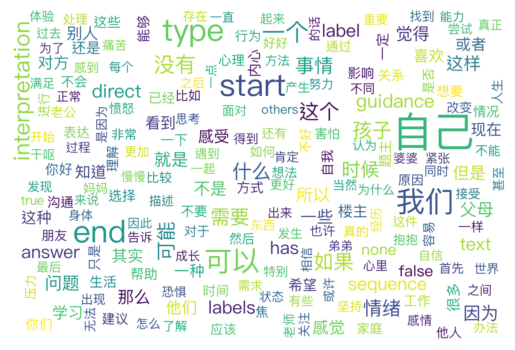

In [114]:
# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 对得到的数据不满意，想通过对数据的清洗去掉一些无效信息

In [2]:
# 导入数据
import pandas as pd

text_ana = pd.read_csv('PsyQA_output.csv', index_col=0)


text_ana

,description,keywords,answers,questionID
question,,,,
去爱一个事事让着你的人，是一种不可能的期待吗？,去爱一个事事让着你的人？有这样的人么？是一种不可能的期待么？,"恋爱,恋爱经营",[{'answer_text': '你好，首先回答你关于有没有事事让着你的人，如果你真的去找...,4394
为什么总是会因为他人学习而过度焦虑？,经常在校园里看到学习的人，于是便觉得自己变得不求上进，心里产生焦虑，害怕和别人的距离拉大，总...,"行为,应激,焦虑,困惑",[{'answer_text': '～～很抱歉看到你最近状态不佳，抱抱你呀～看了你的描述“会...,4395
我们都会和讨厌的人相处吗？怎样相处是最佳方式？,身边如果有讨厌的人，怎样相处是一种最佳方式呢？,"人际,人际边界,社会适应",[{'answer_text': '这可真是个难题呢。想到两种可能。一，这个人讨厌，但于你的...,4397
遇到心动的东西不舍得买，是不爱自己吗？,有时候看到自己喜欢的物品很心动，但是不舍得买，有时看到特别想吃东西，也不舍得买给自己，总要等...,"成长,自我成长,自我接纳,人生意义",[{'answer_text': '题主你好呀！一般来说是这样的，我自己曾经就是这样的人，舍...,4398
工作很压抑，怎么才能和自己和解？或者说改变呢？,工作压力很大，总觉得很多事情都完成不了，所以心里压力特别大，还曾经被挺喜欢的同事欺负，所以更...,"情绪,抑郁情绪,焦虑情绪,情绪调节",[{'answer_text': '希望以下回答能帮助到你：️**首先对你所描述的情况梳理如...,4399
...,...,...,...,...
知道买的东西不一定是自己想要的如何抵抗自己买买买？,经历多个双11，得出结论，在双11买的东西，也并不一定是自己想要的，有的时候买的会过多，可是...,"行为,控制,困惑",[{'answer_text': '题主你好！特别理解你的心情，大多数人都抵挡不住这种诱惑的...,4504
喜欢上了游戏好友怎么办？都对这份感情感到迷茫。,总而言之就是我俩互相喜欢都没有恋爱经验（18岁的19岁）都对这份感情感到迷茫他是很敏感不愿意...,"恋爱,安全感,吵架,好感",[{'answer_text': '豆寇年华，对美好的爱情有止不住的向往，又刚好遇上一个可以...,4505
我们该义无反顾的爱一场吗？,我遇见了一个令我感到自由的男孩，然后那个男孩让我问另一个女孩子有没有女朋友，然后我就对那个男...,"恋爱,依赖依恋,恋爱经营,好感",[{'answer_text': '看了你的描述，那个令你感到自由的男孩，是你比较心动的人。...,4506


In [3]:
# 分析语料
text = list(text_ana['answers'])
text

["[{'answer_text': '你好，首先回答你关于有没有事事让着你的人，如果你真的去找这样的人还是基本上能够找到的，并不算是非常不可能的期待。在我的所见所谓中就看到过不止有一个这样的人。但你要说你还能去爱一个这样的人，那就太不容易了，就变成了比较困难的事情，为什么这样说，通常常见的情况是你爱的人不爱你，爱你的人你又不爱，所以常常难以两全。当然相爱的情况还是很多的，但相爱又要他事事让着你，唔，这就有点麻烦了。无论如何两个人在一起首先是两个相互独立的个体，总有一些自己不同于任何的需要和想法，因为爱，两个人会磨合会有拖鞋和退让，互相拉锯，关系才能保持平衡，如果是只有一方做完全的退让，关系就是失衡的，短暂的时间可以因为爱而维系，但长期关系是很难维持下去的。嗯，所以总结来说，你的期待有点理想化了。', 'has_label': True, 'labels_sequence': [{'start': 0, 'end': 78, 'type': 'Interpretation'}, {'start': 78, 'end': 190, 'type': 'Interpretation'}, {'start': 190, 'end': 313, 'type': 'Interpretation'}, {'start': 313, 'end': 332, 'type': 'Interpretation'}]}]",
 "[{'answer_text': '～～很抱歉看到你最近状态不佳，抱抱你呀～看了你的描述“会因为他人学习而感到焦虑”，看得出来你是一个很有危机感的人，同时，可能比较容易受周围人的影响，对压力的感知也很敏感，很同情你的遭遇呀。我想你应该是一个有上进心的学生，只是暂时没有很坚定的学习方向而已。根据你的描述“经常在校园里看到学习的人，于是便觉得自己变得不求上进，心里产生焦虑”，这种焦虑情绪在校园里很常见，一般来说轻度的焦虑或许能转化为动力，助推我们学习进步，焦虑也就对我们产生了积极的影响。而如果我们不能正确转化这种焦虑，就需要外界的干预、调节焦虑情绪。根据你的描述“害怕和别人的距离拉大，总觉得自己没有进步空间”，从你的这种想法可以看出，你似乎还没有把这种情绪转化成动力，所以你可能需要外界的帮助，比如，及时和老师、朋友交流自己的学习情况，让他们评估一下你的情况或许更客观一

In [4]:
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['answers'] = text_ana['answers'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['answers'].head()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h0/_znycv1j413dcrzbt4jm4gt40000gn/T/jieba.cache
Loading model cost 0.299 seconds.
Prefix dict has been built successfully.


question
去爱一个事事让着你的人，是一种不可能的期待吗？    [ { ' answer _ text ' :   ' 你好 ， 首先 回答 你 关于 有没...
为什么总是会因为他人学习而过度焦虑？         [ { ' answer _ text ' :   ' ～ ～ 很 抱歉 看到 你 最近 状...
我们都会和讨厌的人相处吗？怎样相处是最佳方式？    [ { ' answer _ text ' :   ' 这 可 真是 个 难题 呢 。 想到...
遇到心动的东西不舍得买，是不爱自己吗？        [ { ' answer _ text ' :   ' 题主 你好 呀 ！ 一般来说 是 这...
工作很压抑，怎么才能和自己和解？或者说改变呢？    [ { ' answer _ text ' :   ' 希望 以下 回答 能 帮助 到 你 ...
Name: answers, dtype: object

In [5]:
text = list(text_ana['answers'].dropna())
text

["[ { ' answer _ text ' :   ' 你好 ， 首先 回答 你 关于 有没有 事事 让 着 你 的 人 ， 如果 你 真的 去 找 这样 的 人 还是 基本上 能够 找到 的 ， 并 不算 是 非常 不 可能 的 期待 。 在 我 的 所见 所谓 中 就 看到 过 不止 有 一个 这样 的 人 。 但 你 要说 你 还 能 去 爱 一个 这样 的 人 ， 那 就 太不容易 了 ， 就 变成 了 比较 困难 的 事情 ， 为什么 这样 说 ， 通常 常见 的 情况 是 你 爱 的 人 不 爱 你 ， 爱 你 的 人 你 又 不 爱 ， 所以 常常 难以 两全 。 当然 相爱 的 情况 还是 很多 的 ， 但 相爱 又 要 他 事事 让 着 你 ， 唔 ， 这 就 有点 麻烦 了 。 无论如何 两个 人 在 一起 首先 是 两个 相互 独立 的 个体 ， 总有 一些 自己 不同于 任何 的 需要 和 想法 ， 因为 爱 ， 两个 人会 磨合 会 有 拖鞋 和 退让 ， 互相 拉锯 ， 关系 才能 保持平衡 ， 如果 是 只有 一方 做 完全 的 退让 ， 关系 就是 失衡 的 ， 短暂 的 时间 可以 因为 爱 而 维系 ， 但 长期 关系 是 很 难 维持下去 的 。 嗯 ， 所以 总结 来说 ， 你 的 期待 有点 理想化 了 。 ' ,   ' has _ label ' :   True ,   ' labels _ sequence ' :   [ { ' start ' :   0 ,   ' end ' :   78 ,   ' type ' :   ' Interpretation ' } ,   { ' start ' :   78 ,   ' end ' :   190 ,   ' type ' :   ' Interpretation ' } ,   { ' start ' :   190 ,   ' end ' :   313 ,   ' type ' :   ' Interpretation ' } ,   { ' start ' :   313 ,   ' end ' :   332 ,   ' type ' :   ' Interpretation ' } ] } ]",
 "[ { ' answer _ text '

In [8]:
import json

# 假设你的数据已经存储在 text 变量中了

# 将数据转换为JSON格式
data = list(text_ana['answers'].dropna())
# 将数据写入文件
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)


In [ ]:
PS:还在探索中